# Lab 2: Self-Organizing Maps (Kohonen Maps)

## Course Materials - Unsupervised Learning

---

## 1. Introduction to Self-Organizing Maps

A **Self-Organizing Map (SOM)** or **Kohonen Map** is an unsupervised neural network algorithm based on biological neural models from the 1970s. It uses a competitive learning approach and is primarily designed for:

- **Clustering**: Grouping similar data points together
- **Dimensionality Reduction**: Mapping high-dimensional data to lower-dimensional space
- **Visualization**: Enabling easier interpretation of complex datasets

### Architecture

SOM consists of two primary layers:

1. **Input Layer**: Represents the features of the data
2. **Output Layer**: Arranged as a 2D grid of neurons, where each neuron represents a cluster in the data

## 2. How Self-Organizing Maps Work

The SOM algorithm follows these key steps:

### Step 1: Initialization
- The weights of the output neurons are randomly initialized
- These weights represent the features of each neuron
- Weights will be adjusted during training

### Step 2: Competition
- For each input vector, SOM computes the **Euclidean distance** between the input and the weight vectors of all neurons
- The neuron with the **smallest distance** is the **winning neuron** (Best Matching Unit - BMU)

**Formula:**
$$D(j) = \sum_{i=1}^{n} (w_{ij} - x_i)^2$$

where:
- $D(j)$ is the distance for neuron $j$
- $n$ is the number of features
- $w_{ij}$ is the weight of neuron $j$ for feature $i$
- $x_i$ is the input feature $i$

### Step 3: Weight Update
- The winning neuron's weights are updated to move closer to the input vector
- Neighboring neurons are also adjusted (with smaller changes)

**Formula:**
$$w_{ij}^{(new)} = w_{ij}^{(old)} + \alpha \cdot (x_i - w_{ij}^{(old)})$$

where:
- $\alpha$ is the learning rate
- $x_i$ is the input feature

### Step 4: Learning Rate Decay
- The learning rate $\alpha$ decreases over time
- This allows the map to converge to stable values

**Formula:**
$$\alpha(t+1) = 0.5 \cdot \alpha(t)$$

### Step 5: Stopping Condition
- Training stops when:
  - Maximum number of epochs is reached, OR
  - Weights converge (changes become negligible)

## 3. Implementation in Python

Let's implement the SOM algorithm step by step.

### Step 1: Import Required Libraries

In [1]:
# Import necessary libraries
import math
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


### Step 2: Define the SOM Class

We'll create a class with two key methods:

1. **`winner()`**: Finds the winning neuron (cluster) by computing Euclidean distances
2. **`update()`**: Updates the weight vectors of the winning neuron

In [2]:
class SOM:
    """
    Self-Organizing Map implementation with two clusters
    """
    
    def winner(self, weights, sample):
        """
        Find the winning neuron (Best Matching Unit)
        
        Parameters:
        - weights: Current weight vectors for all neurons
        - sample: Input sample to classify
        
        Returns:
        - Index of the winning neuron (0 or 1)
        """
        D0 = 0  # Distance to cluster 0
        D1 = 0  # Distance to cluster 1
        
        # Calculate Euclidean distance to each cluster
        for i in range(len(sample)):
            D0 += math.pow((sample[i] - weights[0][i]), 2)
            D1 += math.pow((sample[i] - weights[1][i]), 2)
        
        # Return the cluster with minimum distance
        return 0 if D0 < D1 else 1
    
    def update(self, weights, sample, J, alpha):
        """
        Update weights of the winning neuron
        
        Parameters:
        - weights: Current weight vectors
        - sample: Input sample
        - J: Index of winning neuron
        - alpha: Learning rate
        
        Returns:
        - Updated weight vectors
        """
        for i in range(len(weights[0])):
            # Apply weight update formula
            weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])
        
        return weights

print("SOM class defined successfully!")

SOM class defined successfully!


### Step 3: Prepare Training Data

We'll define:
- **Training data (T)**: 4 samples, each with 4 features
- **Initial weights**: Random initialization for 2 clusters
- **Hyperparameters**: Number of epochs and learning rate

In [3]:
# Training data: 4 samples with 4 features each
T = [[1, 1, 0, 0], 
     [0, 0, 0, 1], 
     [1, 0, 0, 0], 
     [0, 0, 1, 1]]

# Get dimensions
m, n = len(T), len(T[0])  # m=4 samples, n=4 features

# Initialize weights for 2 clusters randomly
weights = [[0.2, 0.6, 0.5, 0.9],  # Cluster 0 initial weights
           [0.8, 0.4, 0.7, 0.3]]  # Cluster 1 initial weights

# Create SOM object
som = SOM()

# Hyperparameters
epochs = 10  # Number of training iterations
alpha = 0.5  # Initial learning rate

print(f"Training data shape: {m} samples × {n} features")
print(f"Number of clusters: {len(weights)}")
print(f"Training for {epochs} epochs with initial learning rate α = {alpha}")

Training data shape: 4 samples × 4 features
Number of clusters: 2
Training for 10 epochs with initial learning rate α = 0.5


### Step 4: Train the SOM Network

Training process:
1. Loop through each epoch
2. For each training sample:
   - Find the winning neuron
   - Update the winning neuron's weights
3. Decay the learning rate
4. Store weights for visualization

In [4]:
# Store weight history for visualization
weight_history_0 = []
weight_history_1 = []

# Training loop
for epoch in range(epochs):
    print(f"\n--- Epoch {epoch + 1}/{epochs} (α = {alpha:.4f}) ---")
    
    for j in range(m):
        sample = T[j]
        
        # Find winning neuron
        J = som.winner(weights, sample)
        
        # Update weights
        weights = som.update(weights, sample, J, alpha)
        
        print(f"  Sample {sample} → Cluster {J}")
    
    # Store weights after each epoch
    weight_history_0.append(list(weights[0]))
    weight_history_1.append(list(weights[1]))
    
    # Decay learning rate
    alpha *= 0.9

print("\n" + "="*50)
print("Training completed!")
print("="*50)


--- Epoch 1/10 (α = 0.5000) ---
  Sample [1, 1, 0, 0] → Cluster 1
  Sample [0, 0, 0, 1] → Cluster 0
  Sample [1, 0, 0, 0] → Cluster 1
  Sample [0, 0, 1, 1] → Cluster 0

--- Epoch 2/10 (α = 0.4500) ---
  Sample [1, 1, 0, 0] → Cluster 1
  Sample [0, 0, 0, 1] → Cluster 0
  Sample [1, 0, 0, 0] → Cluster 1
  Sample [0, 0, 1, 1] → Cluster 0

--- Epoch 3/10 (α = 0.4050) ---
  Sample [1, 1, 0, 0] → Cluster 1
  Sample [0, 0, 0, 1] → Cluster 0
  Sample [1, 0, 0, 0] → Cluster 1
  Sample [0, 0, 1, 1] → Cluster 0

--- Epoch 4/10 (α = 0.3645) ---
  Sample [1, 1, 0, 0] → Cluster 1
  Sample [0, 0, 0, 1] → Cluster 0
  Sample [1, 0, 0, 0] → Cluster 1
  Sample [0, 0, 1, 1] → Cluster 0

--- Epoch 5/10 (α = 0.3281) ---
  Sample [1, 1, 0, 0] → Cluster 1
  Sample [0, 0, 0, 1] → Cluster 0
  Sample [1, 0, 0, 0] → Cluster 1
  Sample [0, 0, 1, 1] → Cluster 0

--- Epoch 6/10 (α = 0.2952) ---
  Sample [1, 1, 0, 0] → Cluster 1
  Sample [0, 0, 0, 1] → Cluster 0
  Sample [1, 0, 0, 0] → Cluster 1
  Sample [0, 0, 1, 1

### Step 5: Test the Trained SOM

Now let's classify a test sample using the trained network.

In [5]:
# Test sample
test_sample = [0, 0, 0, 1]

# Find which cluster it belongs to
predicted_cluster = som.winner(weights, test_sample)

print(f"Test Sample: {test_sample}")
print(f"Predicted Cluster: {predicted_cluster}")
print(f"\nFinal Trained Weights:")
print(f"  Cluster 0: {weights[0]}")
print(f"  Cluster 1: {weights[1]}")

Test Sample: [0, 0, 0, 1]
Predicted Cluster: 0

Final Trained Weights:
  Cluster 0: [6.060332016352902e-05, 0.00018180996049058703, 0.5655848232229601, 0.9999696983399182]
  Cluster 1: [0.9999393966798364, 0.4343848751169582, 0.00021211162057235155, 9.090498024529351e-05]


## 4. Visualization

Let's visualize how the SOM learned to cluster the data with two plots:

1. **Weight Convergence**: Shows how each weight component evolves during training
2. **Final Clusters**: 2D projection of input samples and final cluster centers

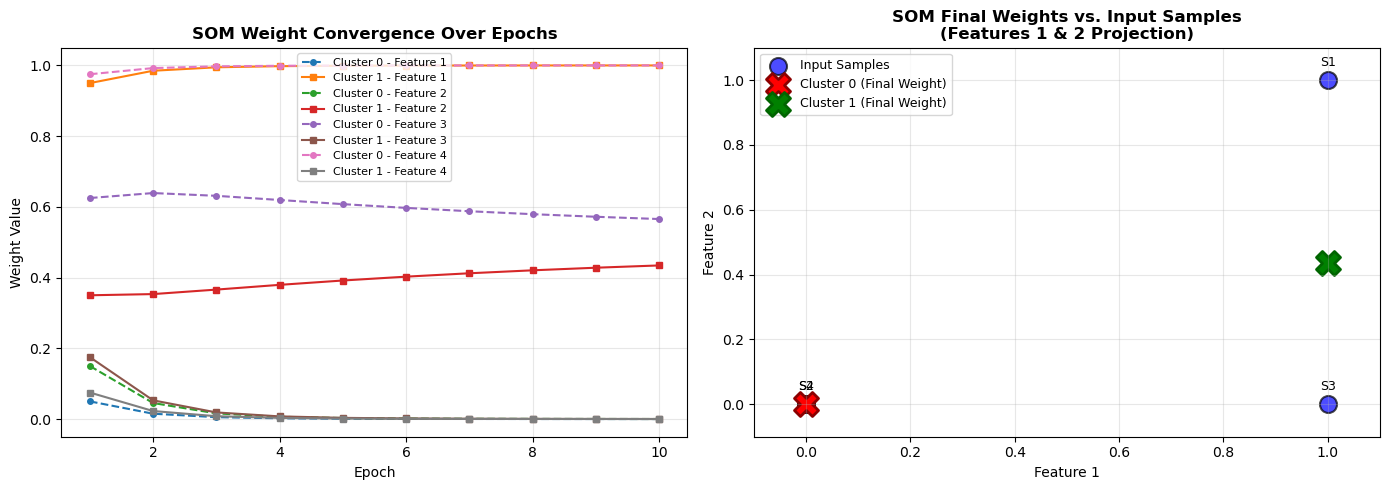

Visualizations created successfully!


In [6]:
# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ============= PLOT 1: Weight Convergence =============
features = [f"Feature {i+1}" for i in range(n)]
epochs_range = range(1, epochs + 1)

for i in range(n):
    # Extract weight values for this feature across all epochs
    feature_data_0 = [w[i] for w in weight_history_0]
    feature_data_1 = [w[i] for w in weight_history_1]
    
    # Plot for both clusters
    axes[0].plot(epochs_range, feature_data_0, 
                 label=f'Cluster 0 - {features[i]}', 
                 linestyle='--', marker='o', markersize=4)
    axes[0].plot(epochs_range, feature_data_1, 
                 label=f'Cluster 1 - {features[i]}', 
                 linestyle='-', marker='s', markersize=4)

axes[0].set_title('SOM Weight Convergence Over Epochs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=10)
axes[0].set_ylabel('Weight Value', fontsize=10)
axes[0].legend(fontsize=8, loc='best')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Final Weights vs. Input Samples =============
# Using first two features for 2D visualization

# Extract first two features from input samples
input_x = [sample[0] for sample in T]
input_y = [sample[1] for sample in T]

# Plot input samples
axes[1].scatter(input_x, input_y, 
                color='blue', marker='o', s=150, 
                label='Input Samples', 
                edgecolors='black', linewidths=1.5, alpha=0.7)

# Extract first two features from final weights
final_weight_0_x = weights[0][0]
final_weight_0_y = weights[0][1]
final_weight_1_x = weights[1][0]
final_weight_1_y = weights[1][1]

# Plot final weight vectors (cluster centers)
axes[1].scatter(final_weight_0_x, final_weight_0_y, 
                color='red', marker='X', s=300, 
                label='Cluster 0 (Final Weight)', 
                edgecolors='darkred', linewidths=2)
axes[1].scatter(final_weight_1_x, final_weight_1_y, 
                color='green', marker='X', s=300, 
                label='Cluster 1 (Final Weight)', 
                edgecolors='darkgreen', linewidths=2)

# Annotate input samples
for i, (x, y) in enumerate(zip(input_x, input_y)):
    axes[1].annotate(f'S{i+1}', (x, y), 
                     textcoords="offset points", 
                     xytext=(0, 10), ha='center', fontsize=9)

axes[1].set_title('SOM Final Weights vs. Input Samples\n(Features 1 & 2 Projection)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=10)
axes[1].set_ylabel('Feature 2', fontsize=10)
axes[1].set_xlim(-0.1, 1.1)
axes[1].set_ylim(-0.1, 1.1)
axes[1].legend(fontsize=9, loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")

## 5. Analysis and Interpretation

### Understanding the Results

1. **Weight Convergence**: 
   - Observe how weights stabilize over epochs
   - The learning rate decay helps smooth convergence
   - Different features may converge at different rates

2. **Cluster Formation**:
   - The SOM has learned to represent the data with 2 cluster centers
   - Each cluster's weights represent a prototypical pattern in the data
   - Similar input samples are mapped to the same cluster

3. **Test Sample Classification**:
   - The test sample `[0, 0, 0, 1]` is classified based on minimum Euclidean distance
   - This demonstrates the SOM's ability to generalize to new data

## 6. Exercise Questions

Try these exercises to deepen your understanding:

1. **Modify the learning rate decay**: Change the decay formula from `alpha *= 0.9` to `alpha *= 0.5`. How does this affect convergence?

2. **Add more clusters**: Extend the SOM class to support 3 or 4 clusters instead of 2.

3. **Change initial weights**: Try different random initializations. Does the SOM still converge to similar clusters?

4. **Add new training samples**: Include samples like `[1, 1, 1, 1]` or `[0, 0, 0, 0]`. How does this change the cluster formation?

5. **Implement neighborhood function**: In classical SOMs, neighboring neurons are also updated (not just the winner). Implement this extension.

## 7. Complete Code (All in One Cell)

Here's the complete implementation for reference:

Test Sample s belongs to Cluster: 0
Trained weights: [[6.060332016352902e-05, 0.00018180996049058703, 0.5655848232229601, 0.9999696983399182], [0.9999393966798364, 0.4343848751169582, 0.00021211162057235155, 9.090498024529351e-05]]


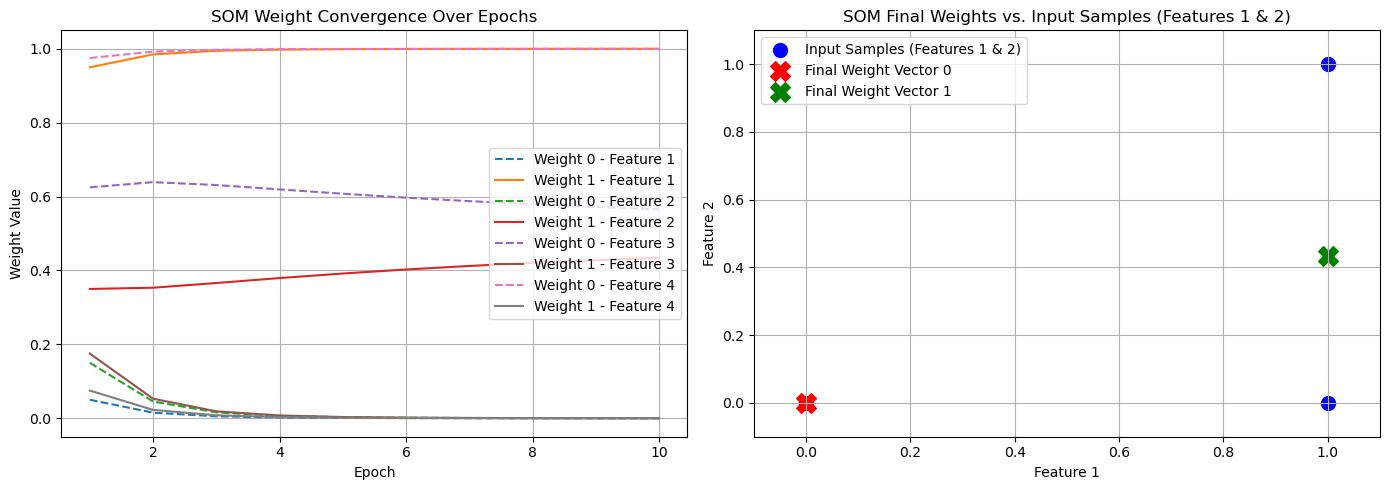

In [7]:
# Complete Self-Organizing Map Implementation

import math
import matplotlib.pyplot as plt
import numpy as np

class SOM:
    def winner(self, weights, sample):
        D0 = 0
        D1 = 0
        for i in range(len(sample)):
            D0 += math.pow((sample[i] - weights[0][i]), 2)
            D1 += math.pow((sample[i] - weights[1][i]), 2)
        return 0 if D0 < D1 else 1
    
    def update(self, weights, sample, J, alpha):
        for i in range(len(weights[0])):
            weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])
        return weights

def main():
    # Training data
    T = [[1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1]]
    m, n = len(T), len(T[0])
    
    # Initialize weights
    weights = [[0.2, 0.6, 0.5, 0.9], [0.8, 0.4, 0.7, 0.3]]
    som = SOM()
    
    # Hyperparameters
    epochs = 10
    alpha = 0.5
    
    # Store weights for visualization
    weight_history_0 = []
    weight_history_1 = []
    
    # Training
    for epoch in range(epochs):
        for j in range(m):
            sample = T[j]
            J = som.winner(weights, sample)
            weights = som.update(weights, sample, J, alpha)
        
        weight_history_0.append(list(weights[0]))
        weight_history_1.append(list(weights[1]))
        alpha *= 0.9
    
    # Test
    s = [0, 0, 0, 1]
    J = som.winner(weights, s)
    
    print("Test Sample s belongs to Cluster:", J)
    print("Trained weights:", weights)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Weight convergence
    features = [f"Feature {i+1}" for i in range(n)]
    epochs_range = range(1, epochs + 1)
    
    for i in range(n):
        feature_data_0 = [w[i] for w in weight_history_0]
        feature_data_1 = [w[i] for w in weight_history_1]
        axes[0].plot(epochs_range, feature_data_0, label=f'Weight 0 - {features[i]}', linestyle='--')
        axes[0].plot(epochs_range, feature_data_1, label=f'Weight 1 - {features[i]}', linestyle='-')
    
    axes[0].set_title('SOM Weight Convergence Over Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Weight Value')
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot 2: Final weights vs input samples
    input_x = [sample[0] for sample in T]
    input_y = [sample[1] for sample in T]
    axes[1].scatter(input_x, input_y, color='blue', marker='o', s=100, label='Input Samples (Features 1 & 2)')
    
    axes[1].scatter(weights[0][0], weights[0][1], color='red', marker='X', s=200, label='Final Weight Vector 0')
    axes[1].scatter(weights[1][0], weights[1][1], color='green', marker='X', s=200, label='Final Weight Vector 1')
    
    axes[1].set_title('SOM Final Weights vs. Input Samples (Features 1 & 2)')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].set_xlim(-0.1, 1.1)
    axes[1].set_ylim(-0.1, 1.1)
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

## 8. Key Takeaways

✅ **SOMs are unsupervised learning algorithms** that perform clustering and dimensionality reduction

✅ **Competitive learning**: Only the winning neuron (and possibly neighbors) gets updated

✅ **Topology preservation**: Similar inputs map to nearby neurons in the output grid

✅ **Learning rate decay**: Essential for convergence and stability

✅ **Applications**: Data visualization, pattern recognition, exploratory data analysis

---

## References

- Kohonen, T. (1982). "Self-organized formation of topologically correct feature maps"
- [GeeksforGeeks - Self-Organising Maps](https://www.geeksforgeeks.org/python/self-organising-maps-kohonen-maps/)
- Haykin, S. (1999). "Neural Networks: A Comprehensive Foundation"

---

*Last Updated: October 2025*